In [1]:
# download kaggle competition data
# use pip install kaggle if unable to run command
!kaggle competitions download -c facial-keypoints-detection

facial-keypoints-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# once downlaoded unzip main data zip files and test training sub-zip files
import zipfile

with zipfile.ZipFile("facial-keypoints-detection.zip", 'r') as zip_ref:
    zip_ref.extractall("facial_data")

with zipfile.ZipFile("facial_data/training.zip", 'r') as zip_ref:
    zip_ref.extractall("facial_data/training")

with zipfile.ZipFile("facial_data/test.zip", 'r') as zip_ref:
    zip_ref.extractall("facial_data/test")


In [1]:
# load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import optimizers
from tensorflow.keras.initializers import glorot_uniform, he_normal

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [2]:
# load train data
train_df = pd.read_csv("facial_data/training/training.csv")
train_data = train_df.values[:,-1]
print(train_data.shape)

# load test data
test_df = pd.read_csv("facial_data/test/test.csv")
test_data = test_df.values[:,-1]
print(test_data.shape)

all_images = np.append(train_data, test_data, axis=0)
all_images.shape

(7049,)
(1783,)


(8832,)

In [3]:
# train auto encoder on all images

# Convert image column to our X dataset reshaped to 96x96
X_all = []
for i in range(0, len(all_images)) :
    img = np.array(all_images[i].split(' '), dtype = 'float') / 255.
    #X.append(img)
    X_all.append(np.expand_dims(img.reshape(96,96), axis=2))
X_all = np.array(X_all, dtype = 'float')
X_all.shape

(8832, 96, 96, 1)

In [4]:
# Sample starter model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import UpSampling2D
model = tf.keras.Sequential()

## Encoder
model.add(Convolution2D(32, (3,3), padding='same', input_shape=(96,96,1), kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(Convolution2D(32, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(Convolution2D(64, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(Convolution2D(96, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(Convolution2D(128, (3,3),padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

## Decoder
# remove this section?
model.add(Convolution2D(128, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(UpSampling2D(size=(2, 2)))
model.add(Convolution2D(96, (3,3), padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(UpSampling2D(size=(2, 2)))
model.add(Convolution2D(64, (3,3),padding='same', kernel_initializer=glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))

model.add(UpSampling2D(size=(2, 2)))
model.add(Convolution2D(32, (3,3),padding='same', activation='relu',kernel_initializer=glorot_uniform(seed=0)))

model.add(Convolution2D(1, (3,3), padding='same', activation='sigmoid', kernel_initializer=glorot_uniform(seed=0)))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
____

In [9]:
optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])



In [13]:
model.fit(X_all,X_all,epochs = 32, batch_size = 32) #, validation_split = 0.1

Epoch 1/32
8832/8832 [==============================] - 18s 2ms/sample - loss: 0.0017 - mean_squared_error: 0.0017 15s - loss: 0.0018 - mean_squared_error: 0 - ETA: 15s - loss: 0.0018 - mean_squared_erro - ETA: 14s - loss: 0.0018 - mean_squared_ - ETA: 1s - loss: 0.0017 - mean_squared_error: 0. - ETA: 1s - loss: 0.0017 - mean_squared_error: 0.00 - ETA: 1s - loss: 0.0017 - mean_squared_error: 0.00 - ETA: 1s - loss: 0.0017 - mean_squar - ETA: 0s - loss: 0.0017 - mean
Epoch 2/32
8832/8832 [==============================] - 18s 2ms/sample - loss: 0.0016 - mean_squared_error: 0.0016 17s - loss: 0.0017 - mean_square - ETA: 16s - loss: 0.0016 - mean_squared_err - ETA: 15s - loss: 0. - ETA: 13s - loss: 0.0016 - mean_squa - ETA: 12s - loss: 0.0016 - mean - ETA: 11s - loss: 0.0016 - mean_squared_error: - ETA: 10s - loss: 0.0016 - mean_squared - ETA: 6s - l - ETA: 1s - loss: 0.0016 - mean_s - ETA: 0s - loss: 0.0016 - mean_squared_error: 0.00 - ETA: 0s - loss: 0.0016 
Epoch 3/32
8832/8832 [=======

8832/8832 [==============================] - 18s 2ms/sample - loss: 0.0010 - mean_squared_error: 0.0010  - ETA: 17s - loss: 9.1260e-04 - mean_squared_error: 9.1260 - ETA: 17s - loss: 9.8141e-04 - mean_squared_error: 9.814 - ETA: 16s - loss: 9.7393e-04 - mean_squared_error: 9.73 - ETA: 16s - loss: 9.9734e-04 - mean_squared_error: 9.9734e-0 - ETA: 16s - loss: 9.8410e-04 - mean_squared_error: 9 - ETA: 15s - loss: 9.7488e-04 - mean_squared_error: 9.74 - ETA: 15s - loss: 9.6894e-04 - mean_s - ETA: 13s - loss: 0.0010 - mean_squared_error: 0.00 - ETA: 13s - loss: 0.0010 - mean_squared_error: 0.001 - ETA: 13s - loss: 0.0010 - mean_squared_error:  - ETA: 13s - loss: 0.0011 - mean_squared_erro - ETA: 12s - loss: 0.0011 - mean_squared_error:  - ETA: 12s - loss: 0.0011 - mean_squared_error: 0. - ETA: 12s - loss: 0.0011 - mean_squared_error: - ETA: 11s - loss: 0.0010 - mean_squared_er - ETA: 10s - loss: 0.0010 - mean_squared_ - ETA: 10s - loss:  - ETA: 8s - loss: 0.0010 - mean_squared_error: 0. - E

8832/8832 [==============================] - 17s 2ms/sample - loss: 9.6807e-04 - mean_squared_error: 9.6807e-043s - loss: 9.9954e-04 - mean_squared_error: 9.9954e-0 - ETA: 13s - loss: 9.9948e-04 - mean_squared_error: 9.9948e-0 - ETA: 13s - loss: 9.9887e-04 - mean_squared_error: 9.988 - - ETA: 9s - loss: 9.9554e-04 - mean_s - ETA: 8s - loss: - ETA: 7s - loss: 9.8 - ETA: 6s - loss: 9.8411e-0 - ETA: 5s - loss: 9.7910e-04 - me - E - ETA: 2s - loss: 9.6510e-04 - mean_squared_error:  - ETA: 2s - loss: 9.6584e-04 - mean_squared - ETA: 1s - loss: 9.7112e-04 - mean_squared_error: 9.71 - ETA: 1s - loss: 9.7178e-04 - mean_squared_error: 9.7178 - ETA: 1s - loss: 9
Epoch 26/32
8832/8832 [==============================] - 17s 2ms/sample - loss: 8.9426e-04 - mean_squared_error: 8.9426e-04 16s - loss: 8.2639e-04 - mean_squared - ETA: 15s - loss: 9.9732e-04 - mean_squared_error: 9 - ETA: 11s - loss: 9.6427e-04 - mean_squared_error:  - ETA: 10s - loss: 9.6460e-04 - mea - - ETA: 1s - loss: 8.9186e-04 - m

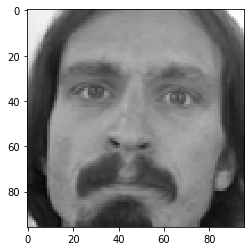

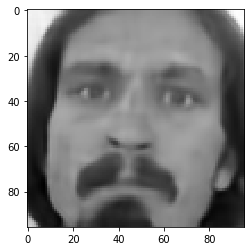

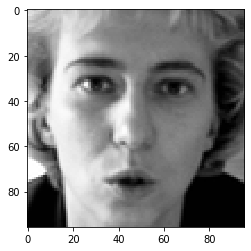

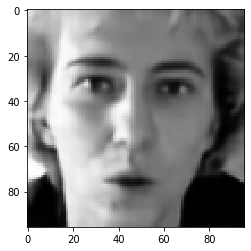

In [16]:
for img_id in range(0,2) :
    img = model.predict(np.expand_dims(X_all[img_id], axis=0))[0]
    img.shape
    # predicted landmarks
    plt.imshow(X_all[img_id,:,:,0],cmap='gray')
    plt.show()
    plt.imshow(img[:,:,0],cmap='gray')
    plt.show()


In [15]:
from tensorflow.keras.models import load_model

model.save('auto_encoder.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
autoencoder = load_model('auto_encoder.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
